<a href="https://colab.research.google.com/github/Khey17/DogBreed-Iden/blob/main/DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

[Kaggle-Dataset](https://www.kaggle.com/competitions/dog-breed-identification/data)

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

[Evaluation](https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation)

## Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we're going to predict them).

In [1]:
# Unzipping Data
# !unzip 'drive/path'

### Workspace

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU (GPU is 30 times faster than CPU in processing) ✅

In [44]:
# Import Statements
import os
import datetime
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import  train_test_split
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow Version: ', tf.__version__)
print('TensorFlow Hub Version: ', hub.__version__)

# Check for GPU availabilty
print('GPU', 'available :)' if tf.config.list_physical_devices('GPU') else 'not available :(')

TensorFlow Version:  2.12.0
TensorFlow Hub Version:  0.13.0
GPU available :)


### Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [3]:
labels = pd.read_csv('/content/drive/MyDrive/DogBreed-Iden/Data/labels.csv')
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [4]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
# How many images are there of each breed?
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [6]:
# On an average there are 82 images per class
labels['breed'].value_counts().median()

82.0

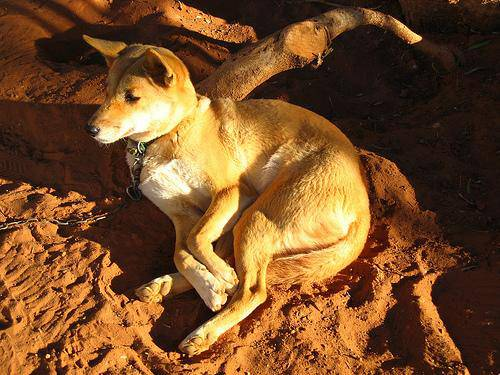

In [7]:
# Preparing the Images
# Let's view an image
Image('/content/drive/MyDrive/DogBreed-Iden/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Getting images and their labels

Let's get a list of all our image file path names.

In [8]:
# Create a pathname from image ID's
filenames = ['/content/drive/MyDrive/DogBreed-Iden/Data/train/' + fname + '.jpg' 
             for fname in labels['id']]

# Check for first 10
filenames[0:10]

['/content/drive/MyDrive/DogBreed-Iden/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Check whether number of filenames mactches number of actual image files
if len(os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train')) == len(filenames):
  print('Filenames match actual amount of files! Proceed.')
else:
  print('Filenames do not match the actual amount of files! check the directory.')

Filenames match actual amount of files! Proceed.


### If the file count doesn't match the following must be done

In [10]:
files = os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train')
act_files = ['/content/drive/MyDrive/DogBreed-Iden/Data/train/' + f for f in files]
act_files[0:10]

['/content/drive/MyDrive/DogBreed-Iden/Data/train/e7c5692d044250d303a839d989132bf1.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79a196a6e1772b9fa6b008b597d3a08.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79f822b26adace4455db1fcd94ab47e.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e7af8f590b4fbdca0779f5e606ef91a1.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e827e6439b32ea68d51e894a7350c699.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e81b2d682dd2a2f5900b07551297f0a5.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e7ab74acdc860dfb93271901da085ffd.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e827550ea6ab19bbd4916d9952ee8765.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e79c6a88cf8da397ee67235a04741f2d.jpg',
 '/content/drive/MyDrive/DogBreed-Iden/Data/train/e82fa6e85fd570b2f766635eed62fdf4.jpg']

In [11]:
extra = list(set(act_files) - set(filenames))
extra

[]

In [12]:
for f in extra:
  os.remove(f)

In [13]:
len(os.listdir('/content/drive/MyDrive/DogBreed-Iden/Data/train'))

10222

### Turning Data labels into numbers/tensors

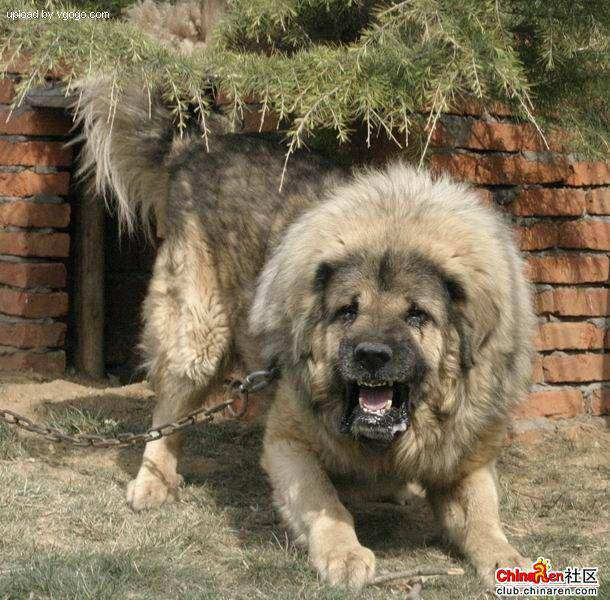

In [14]:
Image(filenames[9000])

Since we've now got our training image filepaths in a list, Let's prepare our labels.

In [15]:
np_labels = labels['breed'].to_numpy()
# labels = np.array(labels)
np_labels, len(np_labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [16]:
# Find unique labels/Breeds
breeds = np.unique(np_labels)
breeds[:20], len(breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull'], dtype=object),
 120)

In [17]:
# Turn a single label into an array of booleans
print(np_labels[0])
np_labels[0] == breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every label into a boolean array
boolean = [label == breeds for label in np_labels]
boolean[0:2], len(boolean)

([array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, False, Fa

In [19]:
# Examples turning boolean array into integers
print(np_labels[0]) # Original Label
print(np.where(breeds == np_labels[0])) # index where label occurs
print(boolean[0].argmax()) # index where label occurs in boolean array
print(boolean[0].astype(int)) # There will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
print(np_labels[1])
print(boolean[1].argmax())
print(boolean[1].astype(int))

dingo
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own Validation Set

In [21]:
# Setup x and y variables
x = filenames
y = boolean

# Start off experimenting with ~1000 images and increase as needed
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min: 1000, max: 10000, step:1000}

# Split the data into train and validation sets
x_tr, x_val, y_tr, y_val = train_test_split(x[:NUM_IMAGES], 
                                            y[:NUM_IMAGES], 
                                            test_size=0.2, 
                                            random_state=42)
len(x_tr), len(y_tr), len(x_val), len(y_val)


(800, 800, 200, 200)

In [22]:
x_tr[:2], y_tr[:2]

(['/content/drive/MyDrive/DogBreed-Iden/Data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/DogBreed-Iden/Data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fals

### Turning our images into tensors (Preprocessing Images)

To Preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [23]:
# Convert an image to a NumPy array
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [25]:
image.max(), image.min()

(255, 0)

In [26]:
# Turn image into a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, Let's make a function to preprocess them

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

In [27]:
# Def image size
IMG_SIZE = 224

# Create a function for preprocessing 
def preprocess(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Check what the function does line by line for better practice

In [28]:
tensor = tf.io.read_file(filenames[26]) # Weird Output : numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x
tensor = tf.image.decode_jpeg(tensor, channels=3)
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

### Turning our Data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (batch size) images at a time (can be manually adjusted) but the default is 32

In order to use TensorFlow effectively, we need our data in the form of TensorFlow effectively, we need our data in the form of Tensor Tuples which look this:

In [29]:
# Create a simple function to return tuple (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label, processes the image and returns a tuple of (image, label)
  '''

  image = preprocess(image_path)
  return image, label

In [30]:
# Demo of the above
(preprocess(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (x & y) into batches

In [31]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_batches(X, y=None, batch_size=BATCH_SIZE, val_data=False, tst_data=False):
  '''
  Creates batches of data out of image X and label y in pairs.
  Shuffles the data if it it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is a dataset, we probably don't have a labels
  if tst_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths (no labels)
    data_batch = data.map(preprocess).batch(BATCH_SIZE)
    # return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif val_data:
    print('Creating a validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                             tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    # return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [32]:
# Create training and validation data batches
tr_data = create_batches(x_tr, y_tr)
val_data = create_batches(x_val, y_val, val_data=True)

Creating training data batches...
Creating a validation data batches...


In [33]:
# Check out the different attributes of our data batches
tr_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing our data

In [34]:
# Create a function for viewing images in a data batch
def show_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i + 1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [35]:
tr_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [36]:
tr_images, tr_labels = next(tr_data.as_numpy_iterator())
len(tr_images), len
(tr_labels)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

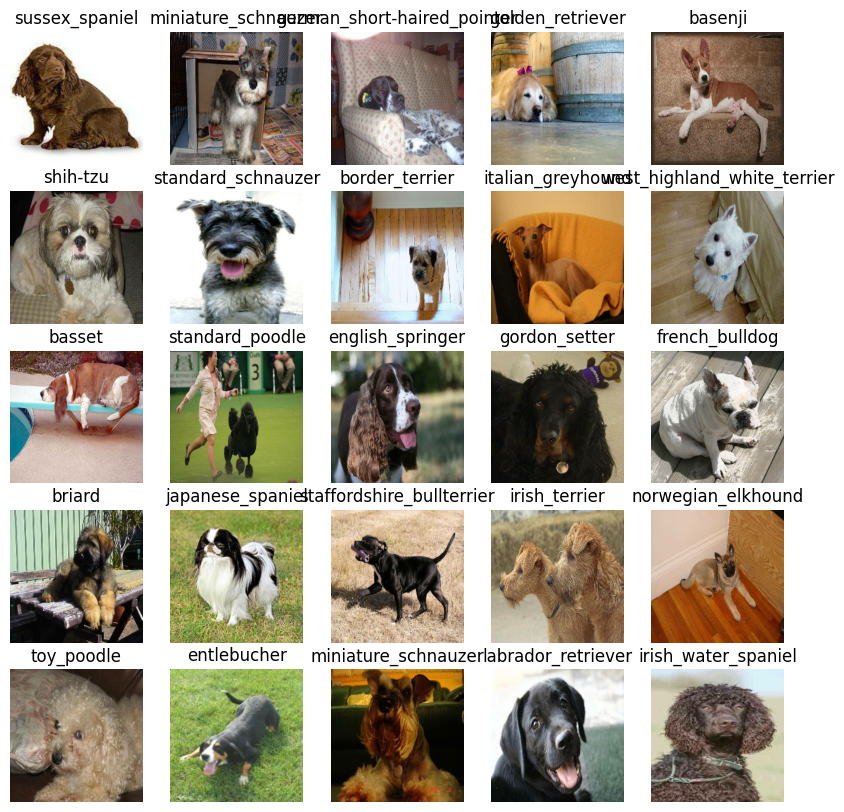

In [37]:
# Now let's visualize the data in a training batch
show_images(tr_images, tr_labels)

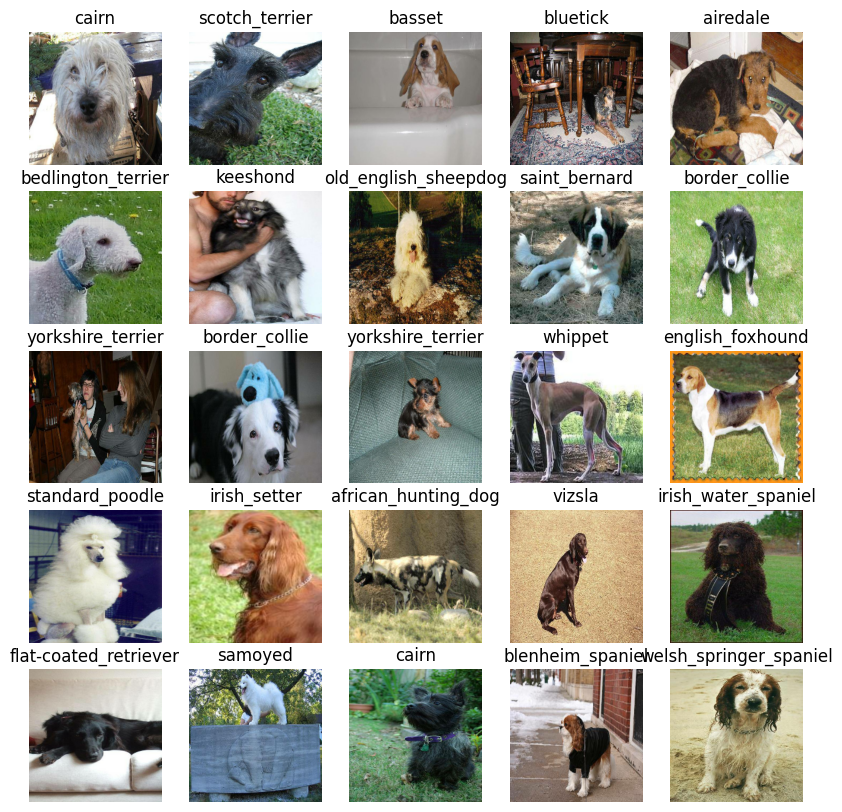

In [38]:
# Now let's visualize validation data
val_images, val_labels =next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

### Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from [TensorFlow Hub](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [39]:
IMG_SIZE

224

In [40]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Input shape of the image

# Setup output shape of our model
OUTPUT_SHAPE = len(breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'


Now we've got our inputs, outputs and model ready to go.
Let's put them together into keras deep learning model!

Knowing this, Let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion (do this first, then this, then that)
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found [here](https://www.tensorflow.org/guide/keras/sequential_model)

In [41]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building model with: ', MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax') # Layer 2 (output layer)

  ])

  # Compilte the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [42]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress. check it's progress, check it's progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our model's progress and another for early stopping which prevents our model from training for too long.

**TensorBoard Callback**

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [46]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [47]:
# Create a function to build a TensorBoard callback
def tensorBoard():
  # Create a log dictionary for storing TensorBoard logs
  logdir = os.path.join('/content/drive/MyDrive/DogBreed-Iden/logs', 
                        # Make it so the logs got tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)